In [1]:
from my_demo_fn import main
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

%load_ext autoreload
%autoreload 2

/home/nripstein/miniconda3/envs/shan_et_al2/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [26]:
# def plot_colored_horizontal_lines(col_dict1, col_dict2):
#     """
#     Plot two colored horizontal lines with labels to the left of them.

#     :param col_dict1: Dictionary for the first line with keys as the end index of the color and values as the colors
#     :param col_dict2: Dictionary for the second line with keys as the end index of the color and values as the colors
#     :param line_height: Height of the lines
#     :param label_offset: Offset to control the distance between lines and labels

#     Example:
#         col_dict1 = {15: 'blue', 20: 'red', 200: 'pink'}
#         col_dict2 = {10: 'green', 30: 'purple', 90: 'orange', 120: "green"}
#         plot_colored_horizontal_lines(col_dict1, col_dict2)
#     """
#     line_width = 10
#     line_height=1
#     label_offset=0.5
#     # Create a figure and a set of subplots
#     fig, ax = plt.subplots(figsize=(line_width, line_height))

#     # Initial start position for the first line
#     start1 = 0
#     for end, color in sorted(col_dict1.items()):
#         ax.plot([start1, end], [0, 0], color=color, lw=line_width, solid_capstyle='butt')
#         start1 = end

#     # Initial start position for the second line
#     start2 = 0
#     for end, color in sorted(col_dict2.items()):
#         print(color)
#         ax.plot([start2, end], [-line_height, -line_height], color=color, lw=line_width, solid_capstyle='butt')
#         start2 = end

#     # Set the limits for the x-axis and y-axis
#     max_x = max(max(col_dict1.keys()), max(col_dict2.keys()))
#     ax.set_xlim(0, max_x)
#     ax.set_ylim(-2 * line_height, line_height)

#     # Remove the y-axis
#     ax.yaxis.set_visible(False)

#     # Remove the spines of the plot
#     for spine in ax.spines.values():
#         spine.set_visible(False)

#     # Add labels to the left of the lines with appropriate offset
#     ax.text(-label_offset, 0, "Pred:", va='center', ha='right', fontsize=12, color='black')
#     ax.text(-label_offset, -line_height, "GT:", va='center', ha='right', fontsize=12, color='black')

#     # Show the plot
#     plt.tight_layout()
#     plt.show()

def get_last_indices_of_consecutive_labels(df):
    last_indices = {}
    last_label = None

    for index, row in df.iterrows():
        current_label = row['contact_label']
        # If the current label is different from the last one, update the dictionary
        if current_label != last_label:
            if last_label is not None:  # to skip the very first label
                last_indices[last_index] = last_label
            last_label = current_label
        last_index = index  # keep track of the last index
    
    # Add the last label and index after the loop
    last_indices[last_index] = current_label

    return last_indices


def plot_colored_horizontal_lines(col_dict1, col_dict2, line_height=1, label_offset=0.5, x_ticks_interval=None):
    """
    Plot two colored horizontal lines with labels to the left of them.

    :param col_dict1: Dictionary for the first line with keys as the end index of the color and values as the colors
    :param col_dict2: Dictionary for the second line with keys as the end index of the color and values as the colors
    :param line_height: Height of the lines
    :param label_offset: Offset to control the distance between lines and labels
    :param x_ticks_interval: Interval for x-axis ticks (set to None for automatic ticks)

    Example:
        col_dict1 = {15: 'blue', 20: 'red', 200: 'pink'}
        col_dict2 = {10: 'green', 30: 'purple', 90: 'orange', 120: "green"}
        plot_colored_horizontal_lines(col_dict1, col_dict2, line_height=1, label_offset=0.5, x_ticks_interval=50)
    """
    line_width = 10

    # Calculate figure height based on line_height and x_ticks_interval
    figure_height = line_height * 1.25 if x_ticks_interval else line_height

    # Create a figure and a set of subplots
    fig, ax = plt.subplots(figsize=(line_width, figure_height))

    # Initial start position for the first line
    start1 = 0
    for end, color in sorted(col_dict1.items()):
        ax.plot([start1, end], [0, 0], color=color, lw=line_width, solid_capstyle='butt')
        start1 = end

    # Initial start position for the second line
    start2 = 0
    for end, color in sorted(col_dict2.items()):
        ax.plot([start2, end], [-line_height, -line_height], color=color, lw=line_width, solid_capstyle='butt')
        start2 = end

    # Set the limits for the x-axis and y-axis
    max_x = max(max(col_dict1.keys()), max(col_dict2.keys()))
    ax.set_xlim(0, max_x)
    ax.set_ylim(-2 * line_height, line_height)

    # Remove the y-axis
    ax.yaxis.set_visible(False)

    # Remove the spines of the plot
    for spine in ax.spines.values():
        spine.set_visible(False)

    # Add labels to the left of the lines with appropriate offset
    ax.text(-label_offset, 0, "Pred:", va='center', ha='right', fontsize=12, color='black')
    ax.text(-label_offset, -line_height, "GT:", va='center', ha='right', fontsize=12, color='black')

    # Set x-axis ticks every x_ticks_interval units if specified
    if x_ticks_interval is not None:
        ax.set_xticks(range(0, int(max_x) + 1, x_ticks_interval))
        ax.tick_params(axis='x', rotation=45)  # Rotate x-axis ticks by 45 degrees

    # Show the plot
    plt.tight_layout()
    plt.show()


def plot_colored_horizontal_lines2(col_dict1, col_dict2, line_height=1, label_offset=0.5, x_ticks_interval=None):
    """
    Plot two colored horizontal lines with labels to the left of them.

    :param col_dict1: Dictionary for the first line with keys as the end index of the color and values as the colors
    :param col_dict2: Dictionary for the second line with keys as the end index of the color and values as the colors
    :param line_height: Height of the lines
    :param label_offset: Offset to control the distance between lines and labels
    :param x_ticks_interval: Interval for x-axis ticks (set to None for automatic ticks)

    Example:
        col_dict1 = {15: 'blue', 20: 'red', 200: 'pink'}
        col_dict2 = {10: 'green', 30: 'purple', 90: 'orange', 120: "green"}
        plot_colored_horizontal_lines(col_dict1, col_dict2, line_height=1, label_offset=0.5, x_ticks_interval=50)
    """
    line_width = 10

    # Create a figure and a set of subplots
    fig, ax = plt.subplots(figsize=(line_width, line_height))

    # Initial start position for the first line
    start1 = 0
    for end, color in sorted(col_dict1.items()):
        ax.plot([start1, end], [0, 0], color=color, lw=line_width, solid_capstyle='butt')
        start1 = end

    # Initial start position for the second line
    start2 = 0
    for end, color in sorted(col_dict2.items()):
        ax.plot([start2, end], [-line_height, -line_height], color=color, lw=line_width, solid_capstyle='butt')
        start2 = end

    # Set the limits for the x-axis and y-axis
    max_x = max(max(col_dict1.keys()), max(col_dict2.keys()))
    ax.set_xlim(0, max_x)
    ax.set_ylim(-2 * line_height, line_height)

    # Remove the y-axis
    ax.yaxis.set_visible(False)

    # Remove the spines of the plot
    for spine in ax.spines.values():
        spine.set_visible(False)

    # Add labels to the left of the lines with appropriate offset
    ax.text(-label_offset, 0, "Pred:", va='center', ha='right', fontsize=12, color='black')
    ax.text(-label_offset, -line_height, "GT:", va='center', ha='right', fontsize=12, color='black')

    # Set x-axis ticks every x_ticks_interval units if specified
    if x_ticks_interval is not None:
        ax.set_xticks(range(0, int(max_x) + 1, x_ticks_interval))
        ax.tick_params(axis='x', rotation=45)

    # Show the plot
    plt.tight_layout()
    plt.show()

from typing import List, Tuple
def comparison_dicts(gt_transitions: List[tuple]) -> Tuple[dict]:
    """
    Args:
        gt_transitions: List of tuples of ground truth transition frames in form [(start1, end1), (start2, end2) ...]
    """

    def transition_to_dict(trns: List[Tuple[int, int]]) -> dict:
        output_dict = {}
        for bound in trns:
            output_dict[bound[0]] = "red"
            output_dict[bound[1]] = "green"
        return output_dict
    
    trans_dict_gt = transition_to_dict(gt_transitions)
    trans_dict_gt[len(sr2_pred)] = "red"  # need to make remaining frames without contact red
    return trans_dict_gt


def get_last_indices_of_consecutive_labels2(df, transformation_dict):
    last_indices = {}
    last_label = None

    for index, row in df.iterrows():
        current_label = row['contact_label']
        # If the current label is different from the last one, update the dictionary
        if current_label != last_label:
            if last_label is not None:  # to skip the very first label
                # Transform the label using the transformation_dict
                transformed_label = transformation_dict.get(last_label, last_label)
                last_indices[last_index] = transformed_label
            last_label = current_label
        last_index = index  # keep track of the last index
    
    # Add the last label and index after the loop
    # Transform the label using the transformation_dict
    transformed_label = transformation_dict.get(current_label, current_label)
    last_indices[last_index] = transformed_label

    return last_indices

In [8]:
sr2_pred = main(save_imgs=False, img_dir='/home/nripstein/Documents/thesis data/thesis labels/sr labels/sr2/shrunk')

Loaded 4278 images.


Processing Images: 4279it [03:14, 22.03it/s]                          


In [9]:
sr2_pred = sr2_pred.iloc[sr2_pred['image'].map(lambda x: int(x.split('_')[0])).argsort()].reset_index(drop=True)

In [10]:
display(sr2_pred.head(10))

,image,contact_label
0,0_sh2.jpg,Stationary Object Contact
1,1_sh2.jpg,Stationary Object Contact
2,2_sh2.jpg,Stationary Object Contact
3,3_sh2.jpg,Portable Object Contact
4,3_sh2.jpg,Stationary Object Contact
5,4_sh2.jpg,Stationary Object Contact
6,5_sh2.jpg,Portable Object Contact
7,5_sh2.jpg,Stationary Object Contact
8,6_sh2.jpg,Stationary Object Contact
9,7_sh2.jpg,Stationary Object Contact


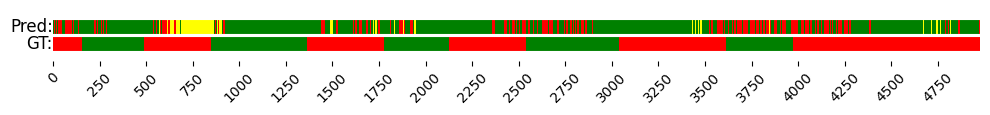

In [30]:
transformation_dict = {"Portable Object Contact": "green", "Stationary Object Contact": "red", "No Contact": "yellow", "Self Contact": "red"}
sr2_pred_dict = get_last_indices_of_consecutive_labels2(sr2_pred, transformation_dict)

sr2_gt = [(156, 491), (850, 1364), (1775, 2127), (2537, 3036), (3612, 3972)]
gt_dict = comparison_dicts(sr2_gt, )

plot_colored_horizontal_lines(sr2_pred_dict, gt_dict, x_ticks_interval=250)


In [12]:
sv2_results = main(save_imgs=False, img_dir='/home/nripstein/Documents/thesis data/thesis labels/sv labels/sv2_frames/shrunk')

Loaded 3851 images.


Processing Images: 3852it [02:52, 22.33it/s]                          


ValueError: The number of FixedLocator locations (20), usually from a call to set_ticks, does not match the number of labels (4977).

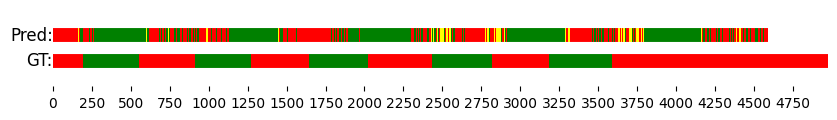

In [13]:
transformation_dict = {"Portable Object Contact": "green", "Stationary Object Contact": "red", "No Contact": "yellow", "Self Contact": "red"}

tmp = sv2_results.iloc[sv2_results['image'].map(lambda x: int(x.split('_')[0])).argsort()].reset_index(drop=True)
sr2_pred_dict = get_last_indices_of_consecutive_labels2(tmp, transformation_dict)

sv2_gt = [(194, 554), (912, 1270), (1643, 2023), (2434, 2816), (3187, 3591)]
gt_dict = comparison_dicts(sv2_gt)

plot_colored_horizontal_lines(sr2_pred_dict, gt_dict, x_ticks_interval=250)

In [ ]:
tmp = sv2_results.iloc[sv2_results['image'].map(lambda x: int(x.split('_')[0])).argsort()].reset_index(drop=True)
tmp

,image,contact_label
0,0_sv2.jpg,Stationary Object Contact
1,1_sv2.jpg,Stationary Object Contact
2,2_sv2.jpg,Stationary Object Contact
3,3_sv2.jpg,Stationary Object Contact
4,4_sv2.jpg,Stationary Object Contact
...,...,...
4588,3848_sv2.jpg,Stationary Object Contact
4589,3849_sv2.jpg,Stationary Object Contact
4590,3849_sv2.jpg,Portable Object Contact
4591,3850_sv2.jpg,Stationary Object Contact


# Getting size

In [ ]:
tmp = main(save_imgs=True, verbose=True)

load checkpoint models/res101_handobj_100K/pascal_voc/faster_rcnn_1_8_132028.pth
loaded model successfully!
image dir = images
save dir = images_det
Loaded 1 images.


----------------------48_nr.jpg----------------------
targetobject
Detection 0: Contact Type - P
----------------------48_nr.jpg----------------------
hand
Detection 0: Contact Type - P
Detection 1: Contact Type - P


----------------------48_nr.jpg----------------------
targetobject
Detection 0: Contact Type - P
----------------------48_nr.jpg----------------------
hand
Detection 0: Contact Type - P
Detection 1: Contact Type - P


Processing Images: 2it [00:00,  8.89it/s]
